## xcube CMEMS Data Store 

*Please checkout the general introduction to xcube data stores in the Jupyter Notebook Getting Started before jumping into this notebook :)*

This notebook provides a walk-through demonstrating how to use xcube and the xcube-cmems plugin to read and explore data from the CMEMS API.

In order to run this notebook you need to install the xcube_cmems plugin. You may do so by executing the following line in your terminal:

``` $  conda install -c conda-forge xcube-cmems ```

*Or you can install the xcube_cmems plugin from sources by following the instructions on https://github.com/dcs4cop/xcube-cmems.*

set `CMEMS_USERNAME` and `CMEMS_PASSWORD` as environment variables
If you do not have cmems user yet, you can register for an [account](https://resources.marine.copernicus.eu/registration-form)

In [1]:
# os.environ["CMEMS_USERNAME"] =  ""
# os.environ["CMEMS_PASSWORD"] = ""

In [2]:
import os
# mandatory imports
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
from IPython.display import JSON

Check whether the `cmems` store is among the available stores, if not please follow the installation information from the top of this notebook. 

In [3]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

In [4]:
get_data_store_params_schema('cmems')

In [5]:
store = new_data_store('cmems')
store

Get all the data ids in `cmems` datastore

In [6]:
JSON(store.list_data_ids())

<IPython.core.display.JSON object>

Get more info about a specific dataset.

In [6]:
store.describe_data('DMI-BALTIC-SST-L3S-NRT-OBS_FULL_TIME_SERIE')

Which parameters must be passsed or are available to open the dataset? 

In [7]:
store.get_open_data_params_schema('DMI-BALTIC-SST-L3S-NRT-OBS_FULL_TIME_SERIE')

The dataset can be opened by giving variables_names, time_range and bbox as params, but none of them are mandatory.

In [8]:
dataset = store.open_data('DMI-BALTIC-SST-L3S-NRT-OBS_FULL_TIME_SERIE', 
                          variable_names=['sea_surface_temperature'], 
                          bbox=[9, 53, 20, 62], 
                          time_range=('2022-01-01','2022-01-05'))
dataset

<xarray.Dataset>
Dimensions:                  (time: 5, lat: 451, lon: 551)
Coordinates:
  * lat                      (lat) float32 53.0 53.02 53.04 ... 61.96 61.98 62.0
  * lon                      (lon) float32 9.0 9.02 9.04 ... 19.96 19.98 20.0
  * time                     (time) datetime64[ns] 2022-01-01 ... 2022-01-05
Data variables:
    sea_surface_temperature  (time, lat, lon) float32 dask.array<chunksize=(1, 451, 551), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.6
    title:                      Baltic Sea - SST Analysis
    summary:                    DMI Sea Surface Temperature  supercollated le...
    references:                 Høyer, J. L., Le Borgne, P., & Eastwood, S. (...
    institution:                Danish Meteorological Institute, DMI
    history:                    Version 1.0
    ...                         ...
    publisher_name:             GHRSST project office
    publisher_url:              http://www.ghrsst.org
    publisher_email:             ghrsst-po@nceo.ac.uk
    processing_level:           L3S
    cdm_data_type:              grid
    comment:                    IN NO EVENT SHALL DMI OR ITS REPRESENTATIVES ...

In [9]:
dataset.sea_surface_temperature

<xarray.DataArray 'sea_surface_temperature' (time: 5, lat: 451, lon: 551)>
dask.array<getitem, shape=(5, 451, 551), dtype=float32, chunksize=(1, 451, 551), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 53.0 53.02 53.04 53.06 ... 61.94 61.96 61.98 62.0
  * lon      (lon) float32 9.0 9.02 9.04 9.06 9.08 ... 19.94 19.96 19.98 20.0
  * time     (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-01-05
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sea surface foundation temperature
    units:          kelvin
    comment:        Foundation sea surface temperature of the ocean
    source:         OSI-SAF and GHRSST L2P satellite SST products
    valid_min:      -300
    valid_max:      4500

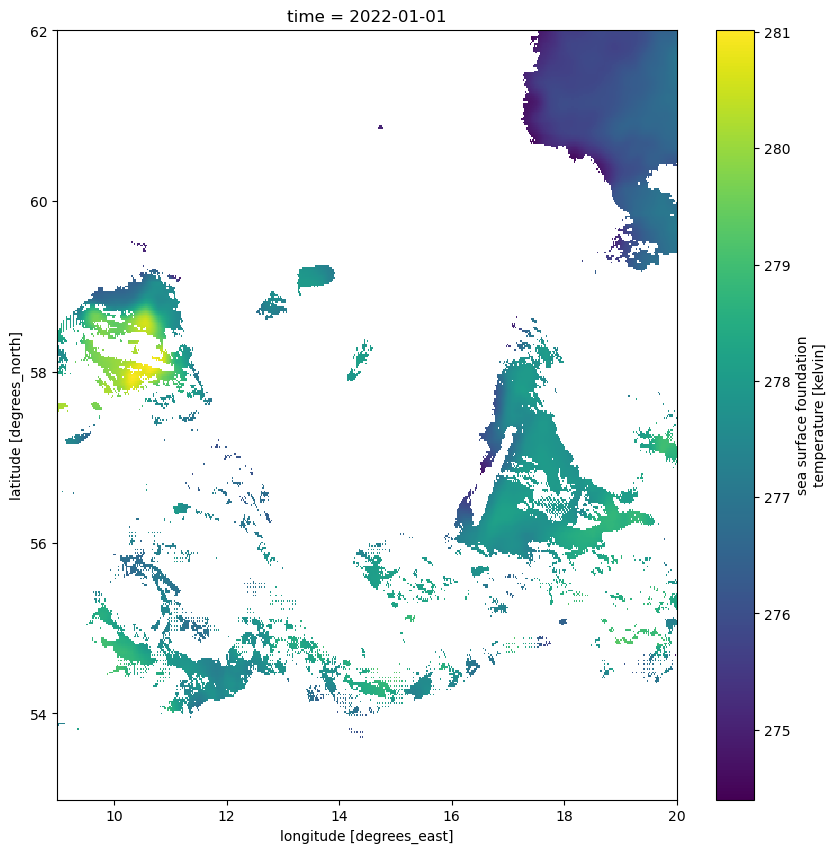

In [10]:
dataset.sea_surface_temperature[0].plot(figsize=(10, 10))